### This code is a implementation of multi-variate polynomial regression with sklearn

In [13]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

%matplotlib inline

import numpy as np 
import scipy as sp

import matplotlib.pyplot as plt
from numpy import linalg, zeros, ones, hstack, asarray
import itertools
from mpl_toolkits import mplot3d

In [7]:
df = pd.read_csv("/Users/waldo/AI HUB/Project/FinallProject/Dataset/us_daily_2.csv")
df.head()

,date,datenum,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,...,lastModified,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20200720,128.0,56,3813916,42655608,3003.0,58330.0,279030.0,6558.0,12475.0,...,2020-07-20T00:00:00Z,46472527,46469524,46469524,365,1652,677249,57948,735197,67d367af6c685d8ba81dd2d4f9ea953c9e8a4d1e
1,20200719,127.0,56,3755968,41978359,3052.0,57790.0,277378.0,6391.0,12391.0,...,2020-07-19T00:00:00Z,45737379,45734327,45734327,523,939,704916,63907,768823,8ebbf82831bb2025b7603a8bf00ae9cbd7747175
2,20200718,126.0,56,3692061,41273443,3032.0,57559.0,276439.0,6396.0,12342.0,...,2020-07-18T00:00:00Z,44968536,44965504,44965504,872,2003,696591,65180,761771,f27f83f9107b0cda5f154c50ba724c7df59b4ddd
3,20200717,125.0,56,3626881,40576852,3002.0,57705.0,274436.0,6453.0,12243.0,...,2020-07-17T00:00:00Z,44206735,44203733,44203733,951,2678,774555,77233,851788,2fd5fa9462df840f6808d6757e4d13f702be8fdb
4,20200716,124.0,56,3549648,39802297,2929.0,57369.0,271758.0,6359.0,12091.0,...,2020-07-16T00:00:00Z,43354874,43351945,43351945,974,2215,753635,70953,824588,8644aacf2b4997ff08daf87ae088c7f6a44cb367


(128, 2)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


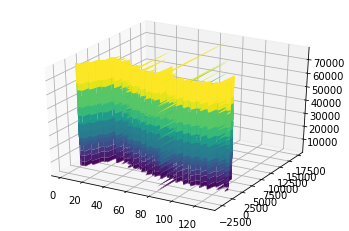

In [24]:
df = df[(df['datenum'] < 129) & (df['datenum'] > 0)]
df_x1 = df['datenum']
df_x2 = df['hospitalizedIncrease']
df_y = df['positiveIncrease']
df_x = pd.concat([df_x1,df_x2],axis=1)

df_y = pd.DataFrame(data=df_y, columns=['positiveIncrease'])
print(df_x.shape)
print (type(df_x))
print (type(df_y))
df_x.head()
df_y.head()

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(df_x1, df_x2, df_y, color='blue', cmap='viridis', edgecolor='none')


In [11]:
i_train, i_test = train_test_split(range((df_x.values).shape[0]),train_size=0.8)

X_train1 = df_x.datenum[i_train]
X_train2 = df_x.hospitalizedIncrease[i_train]
X_train = pd.concat([X_train1,X_train2],axis=1).values
print(X_train.shape)

y_train = df_y.positiveIncrease[i_train]
print(y_train.shape)

X_test1 = df_x.datenum[i_test]
X_test2 = df_x.hospitalizedIncrease[i_test]
X_test = pd.concat([X_test1,X_test2],axis=1).values
print(X_test.shape)

y_test = df_y.positiveIncrease[i_test]
print(y_test.shape)

#Initialize a list for R-square score
score_all = []

for d in range(1,11):
#Generate polynomial features
    poly = PolynomialFeatures(degree=d)

#Transform the x data for proper fitting (for single variable type it returns,[1,x,x**2])
    X_train_poly = poly.fit_transform(X_train)

#Transform the prediction to fit the model type
    X_test_poly = poly.fit_transform(X_test)

#Here we can remove polynomial orders we don't want. For instance I'm removing the `x` component
    X_train_poly = np.delete(X_train_poly,(1),axis=1)
    X_test_poly = np.delete(X_test_poly,(1),axis=1)

#Generate the regression object
    clf = LinearRegression()
#Preform the actual regression
    clf.fit(X_train_poly, y_train)
    
    scores = cross_val_score(clf, X_train_poly, y_train, cv=5, scoring = 'neg_mean_squared_error')
    #print(clf.predict(X_train_poly).shape)
    #print(y_train.shape)
    score_all.append(scores.mean())

    print("Prediction in degree = {} ".format(d),clf.predict(X_test_poly))
    print("====================================")
print("Score = ",score_all)

bestd = np.argmax(score_all)
print(bestd+1)

(102, 2)
(102,)
(26, 2)
(26,)
Prediction in degree = 1  [30941.09220176 29835.07162215 29836.50863459 30439.57485795
 30301.62166309 30546.15328107 30084.87228576 30075.77120693
 30357.18614436 30197.91726488 30109.30149735 30288.20954693
 30372.27477505 30010.62664269 30133.25170479 30276.71344736
 30567.70846776 30156.24390393 30242.94365486 30318.62631038
 30771.76423516 30290.12556352 30362.69469207 30175.88307403
 29962.24722366 30145.94531473]
Prediction in degree = 2  [35925.5531799    707.18269338   787.15160134 19342.68616159
 51543.21044373 22161.72328931 17744.97678082 29251.20065979
 20156.97523671 33008.67217078 21224.9545061  15208.54093199
 32924.70037934 36160.33282626 41321.28785203 23967.48730778
 23281.51296355 21107.06164678 28476.53556438 20655.04818748
 27150.60745962 15327.40853927 58636.3889672  47253.96014052
 32204.257683   40872.78508314]
Prediction in degree = 3  [35561.75440803  6834.21307722  6870.99727608 23967.41803714
 52054.20665619 25771.49565889 1484